<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/Clustering_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validación resultado clustering

Text(0.5, 1.0, 'k-means simple blobs')

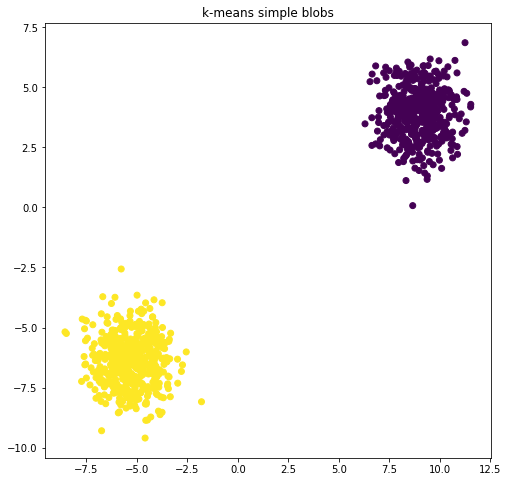

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1000
X, y = make_blobs(n_samples=n_samples, centers = 2)

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")